## NATURAL LANGUAGE PROCESSING

Dalam era digital saat ini, platform digital untuk pencarian pekerjaan menjadi semakin populer. Namun, seiring bertumbuhnya platform digital ini, muncul pula masalah tentang adanya lowongan kerja palsu (fake job posting). Lowongan palsu dapat merugikan pencari pekerja dengan mengarahkan mereka ke penipuan atau pekerjaan yang tidak sesuai dengan deskripsi aslinya. Maka, kami mengusulkan Fake Job Posting Detection untuk memprediksi postingan lowongan kerja palsu.

## JOB POSTING



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from scipy.sparse import hstack
from wordcloud import WordCloud
import spacy
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split, cross_val_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.exceptions import ConvergenceWarning
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

## DATA PRE-PROCESSING

In [2]:
df = pd.read_csv('fake_job_postings.csv')
df

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


Kami memilih data dari website kaggle ini karena dataset yang diberikan sudah terkumpul 17014 data real dan 866 data fraudulent dari berbagai negara.

In [3]:
df.shape

(17880, 18)

In [4]:
df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
categorical=[]
numerical=[]

for col in df.columns:
    if df[col].dtypes !='object':
            numerical.append(col)
    else:
        categorical.append(col)

In [7]:
print(len(categorical))
print(categorical)

13
['title', 'location', 'department', 'salary_range', 'company_profile', 'description', 'requirements', 'benefits', 'employment_type', 'required_experience', 'required_education', 'industry', 'function']


In [8]:
df[numerical].describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
df[numerical][df[numerical]=='?'].count()

job_id              0
telecommuting       0
has_company_logo    0
has_questions       0
fraudulent          0
dtype: int64

In [10]:
df[categorical][df[categorical]=='?'].count()

title                  0
location               0
department             0
salary_range           0
company_profile        0
description            0
requirements           0
benefits               0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
dtype: int64

<Axes: >

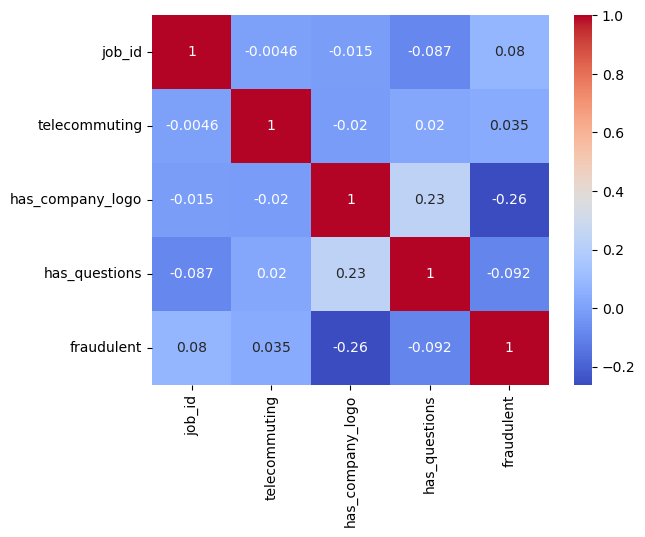

In [11]:
sns.heatmap(df[numerical].corr(), cmap='coolwarm', annot=True)

Berdasarkan grafik heatmap diatas, kita dapat melihat bahwa terdapat korelasi antar fitur. Semakin nilai mendekati angka 1 maka korelasi positif semakin tinggi dimana artinya ketika suatu fitur meningkat maka fitur berkolerasi lainnya akan meningkat juga. Namun saat nilai suatu korelasi semakin mendekati angka -1 maka korelasi akan berbanding terbalik, artinya ketika suatu fitur meningkat maka fitur yang berkolerasi lainnya akan menurun. Oleh karena itu, kami memutuskan untuk menghapus fitur has_questions dan fitur telecommuting karena keduanya memiliki korelasi yang paling kecil dengan fitur fraudulent. Kita cukup mengambil job_id dan has_company_logo. Fitur-fitur yang diambil untuk grafik heatmap ini adalah data-data numerical saja.  

## Feature Drop

In [12]:
numerical_to_drop=['telecommuting','has_questions']

df.drop(columns=numerical_to_drop, inplace=True)

Pre-processing Feature drop ini dilakukan dengan menghapus fitur yang korelasinya tidak terlalu signifikan terhadap fitur fraudulent melalui analisa heat map. 

## Missing data imputation

Pre-processing missing data imputation dilakukan dengan mengganti isi fitur yang berisi NaN menjadi Null. Hal ini dilakukan agar seluruh data dapat diproses oleh komputer.

In [13]:
#Missing data imputation

df.fillna(' ',inplace=True)
df.isnull().sum()

job_id                 0
title                  0
location               0
department             0
salary_range           0
company_profile        0
description            0
requirements           0
benefits               0
has_company_logo       0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

In [14]:
df

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,has_company_logo,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,1,Other,Internship,,,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,1,Full-time,Not Applicable,,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",,,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,1,,,,,,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,1,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",,,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,1,Full-time,Mid-Senior level,,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",,,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,,0,Full-time,,,,,0
17878,17879,Graphic Designer,"NG, LA, Lagos",,,,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,Contract,Not Applicable,Professional,Graphic Design,Design,0


In [15]:
df['country'] = df['location'].str.split(',').str[0]

Split data berfungsi untuk mengambil data nama country dari fitur location. Lalu, data country tersebut dimasukkan ke kolom baru bernama country.

In [16]:
df.nunique()

job_id                 17880
title                  11231
location                3106
department              1337
salary_range             875
company_profile         1710
description            14802
requirements           11969
benefits                6206
has_company_logo           2
employment_type            6
required_experience        8
required_education        14
industry                 132
function                  38
fraudulent                 2
country                   91
dtype: int64

<Axes: xlabel='fraudulent', ylabel='count'>

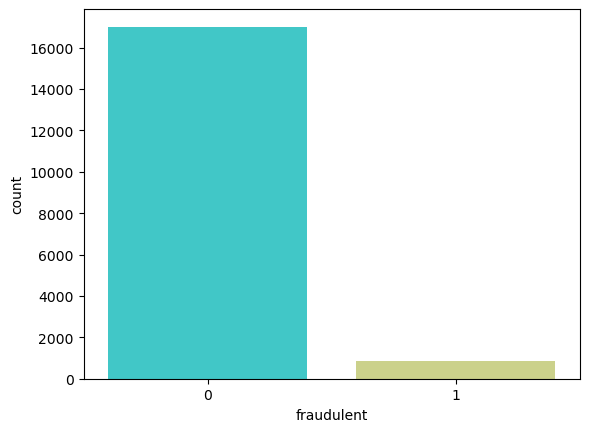

In [17]:
sns.countplot(data=df,x='fraudulent',palette='rainbow')

Berikut adalah bar chart perbandingan jumlah data real dan fraudulent.

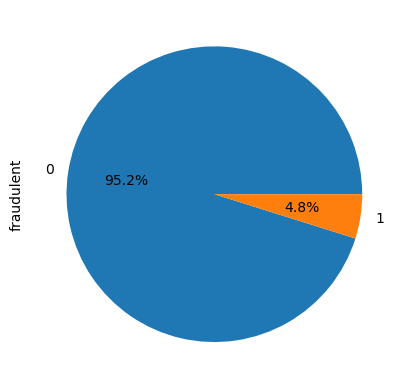

In [18]:
#pie chart

counts = df['fraudulent'].value_counts()
counts.plot.pie(autopct='%1.1f%%')
plt.show()

Pie chart di atas menunjukkan perbandingan persentase jumlah iklan yang real dan fraudulent (palsu). 0 adalah real dan 1 adalah palsu. Dapat dilihat dari seluruh iklan lowongan pekerjaan yang ada di berbagai negara, lowongan pekerjaan yang real memiliki persentase yang sangat besar dibandingkan lowongan pekerjaan palsu. Hal ini menandakan bahwa lowongan pekerjaan yang palsu masih sangat sedikit.

In [19]:
fake=df[df['fraudulent']==1]
fake.shape

(866, 17)

In [20]:
real=df[df['fraudulent']==0]
real.shape

(17014, 17)

In [21]:
real=real.sample(3000,replace=True)

In [22]:
fake=fake.sample(3000,replace=True)

In [23]:
real.shape,fake.shape

((3000, 17), (3000, 17))

In [24]:
df = pd.concat([fake, real], ignore_index=True)
df.reset_index()

,index,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,has_company_logo,employment_type,required_experience,required_education,industry,function,fraudulent,country
0,0,2022,Subsea Process System Engineer,"US, TX, Houston",,,Aker Solutions is a global provider of product...,Corporate overviewAker Solutions is a global p...,Qualifications &amp; personal attributesQualif...,We offer• Friendly colleagues in an industry w...,1,Full-time,,Master's Degree,Oil & Energy,Engineering,1,US
1,1,17576,Customer Service Reps,"US, CA,",Customer Service,,,We are seeking a Customer Service Representati...,,,0,Full-time,,,,Customer Service,1,US
2,2,5761,"Agency Sales Managers $150-$175,000/yr","US, NY, Hudson Valley",,,We have aggressive growth plans in place for t...,We provide No Credit Check Financing to custom...,Experience and Skills Required- Minimum of 3 ...,We Provide- Complete online training and offic...,1,Full-time,Associate,High School or equivalent,Financial Services,Sales,1,US
3,3,3190,Payroll Data Coordinator Positions - Earn $100...,"US, NC, Aberdeen",,,,We are a full-service marketing and staffing f...,RequirementsAll you need is access to the Inte...,This is an entry level position and we offer f...,0,,,,,,1,US
4,4,4833,Senior Engineering Product Manager,"TW, TPQ, Taipei",Engineering,,Aptitude Staffing Solutions has redesigned the...,Senior Engineering Product Manager | Taiwan Ta...,,What Is Offered:Very competitive base salary.3...,1,Full-time,Mid-Senior level,Bachelor's Degree,Telecommunications,Engineering,1,TW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,5995,9300,Interior Stylist/ Producer,"GB, LND,",Content,21000-25000,"We design, make and sell furniture, with a sim...",Please note that this is NOT an interior desig...,1-2 year experience in a similar stylist or pr...,As much fuel and caffeine as you can handleBea...,1,Full-time,Associate,Unspecified,Retail,Art/Creative,0,GB
5996,5996,11682,Product Marketing Manager,"US, CA, Menlo",Marketing,,Interana is for interactive exploration of eve...,"As a Product Marketing Manager, you will be re...","Assist in developing product positioning, prod...",Fun startup working environmentCompetitive sal...,1,Full-time,Associate,Bachelor's Degree,Marketing and Advertising,Marketing,0,US
5997,5997,2227,Field Executive,"IN, HR, Gurgaon",Admin,96000-100000,,The Candidate should have own vehicle (motorcy...,,,0,Full-time,Executive,Bachelor's Degree,Information Technology and Services,Administrative,0,IN
5998,5998,16435,Front-End Developer,"NZ, N, Auckland",,,Every day we challenge ourselves to improve ou...,Propellerhead is an innovative technology and ...,Our leading criteria when recruiting a new dev...,Highly technical landscape;Auckland CBD based;...,1,Full-time,Not Applicable,,Information Technology and Services,,0,NZ


<Axes: xlabel='fraudulent', ylabel='count'>

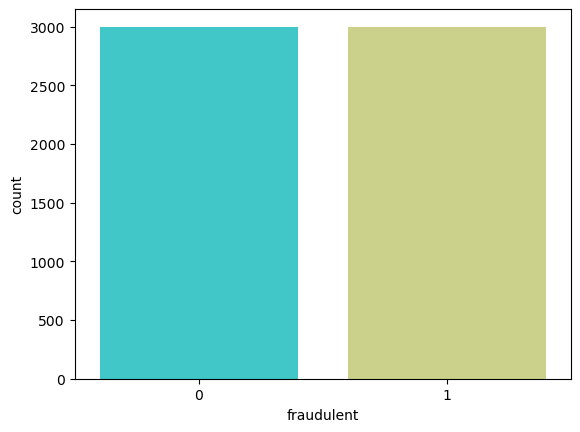

In [25]:
sns.countplot(data=df,x='fraudulent',palette='rainbow')

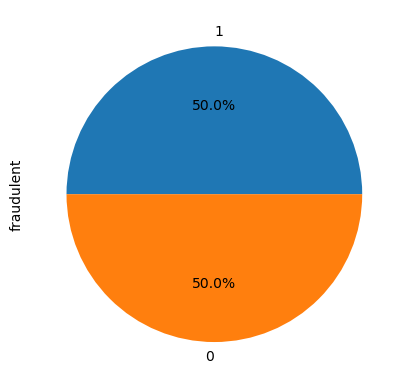

In [26]:
#pie chart

counts = df['fraudulent'].value_counts()
counts.plot.pie(autopct='%1.1f%%')
plt.show()

Pre-processing balancing & sampling data bekerja dengan cara mengambil sampel data untuk menyeimbangkan jumlah data postingan pekerjaan yang asli dan palsu agar mudah diproses. Data asli akan dikurangi dan data palsu akan ditambahkan.

Kita memilih melakukan balancing dengan cara sampling agar data tidak bias ke data yang lebih banyak jumlahnya.

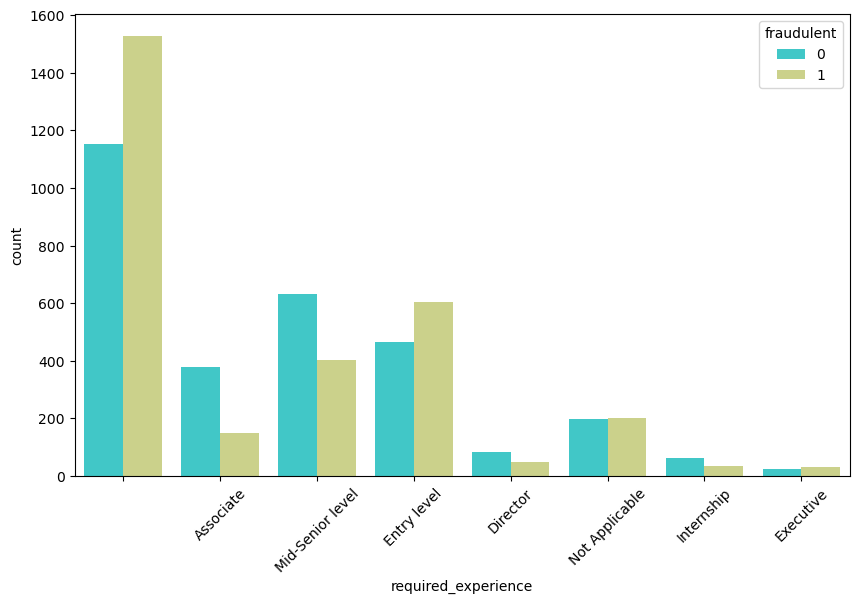

In [27]:
#bar chart

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='required_experience', hue='fraudulent', palette='rainbow')
plt.xticks(rotation=45)

plt.show()

Bar chart ini menunjukkan jumlah masing-masing posisi pada lowongan pekerjaan real dan fraudulent. Lowongan pekerjaan palsu paling banyak dan seringkali tidak menampilkan required experience yang dicari. Namun selain null, kita dapat lihat bahwa lowongan pekerjaan palsu seringkali memaparkan required experience di level entry. Dari sini kita dapat menyimpulkan bahwa pekerjaan yang paling mudah ditipu adalah pekerjaan entry level.

Text(0, 0.5, 'No. of Jobs')

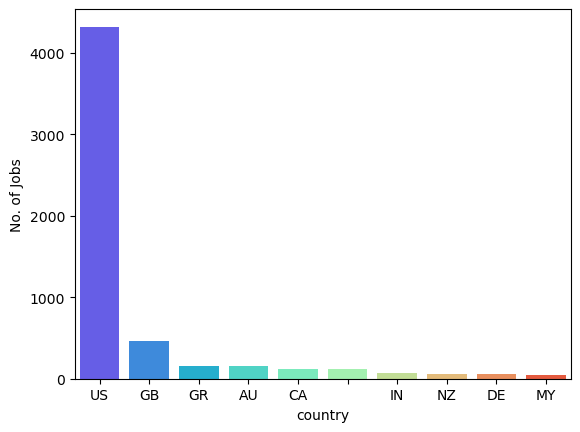

In [28]:
country = df['country'].value_counts().nlargest(10).index.tolist()
ax=sns.countplot(data=df, x='country', order=country, palette='rainbow')
ax.set_ylabel('No. of Jobs')

Text(0, 0.5, 'No. of Jobs')

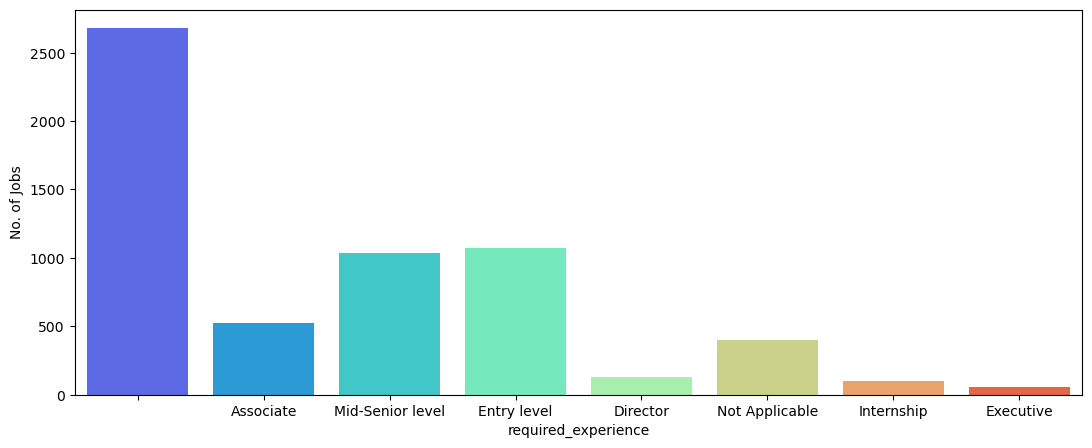

In [29]:
plt.figure(figsize=(13,5))
ax = sns.countplot(data=df, x='required_experience', palette='rainbow')
ax.set_ylabel('No. of Jobs')

Text(0, 0.5, 'No. of Jobs')

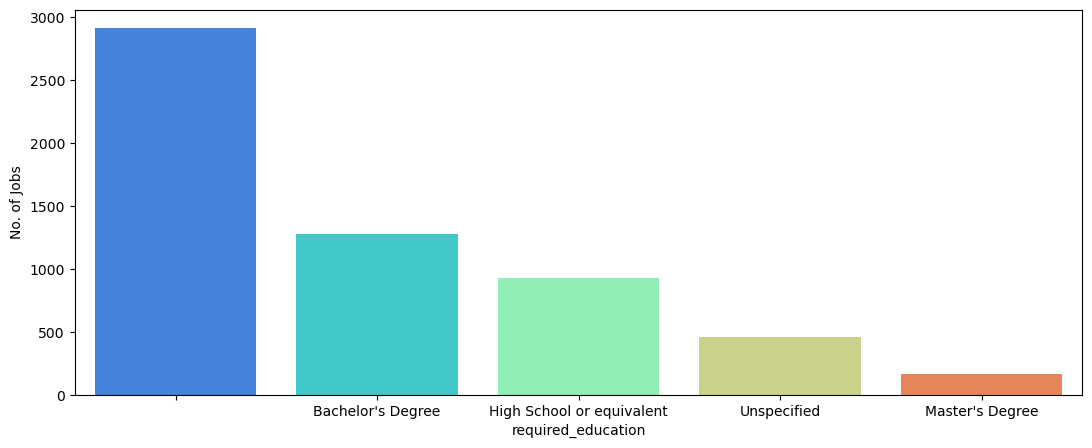

In [30]:
plt.figure(figsize=(13,5))
country = df['required_education'].value_counts().nlargest(5).index.tolist()
ax=sns.countplot(data=df, x='required_education', order=country, palette='rainbow')
ax.set_ylabel('No. of Jobs')

In [31]:
df

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,has_company_logo,employment_type,required_experience,required_education,industry,function,fraudulent,country
0,2022,Subsea Process System Engineer,"US, TX, Houston",,,Aker Solutions is a global provider of product...,Corporate overviewAker Solutions is a global p...,Qualifications &amp; personal attributesQualif...,We offer• Friendly colleagues in an industry w...,1,Full-time,,Master's Degree,Oil & Energy,Engineering,1,US
1,17576,Customer Service Reps,"US, CA,",Customer Service,,,We are seeking a Customer Service Representati...,,,0,Full-time,,,,Customer Service,1,US
2,5761,"Agency Sales Managers $150-$175,000/yr","US, NY, Hudson Valley",,,We have aggressive growth plans in place for t...,We provide No Credit Check Financing to custom...,Experience and Skills Required- Minimum of 3 ...,We Provide- Complete online training and offic...,1,Full-time,Associate,High School or equivalent,Financial Services,Sales,1,US
3,3190,Payroll Data Coordinator Positions - Earn $100...,"US, NC, Aberdeen",,,,We are a full-service marketing and staffing f...,RequirementsAll you need is access to the Inte...,This is an entry level position and we offer f...,0,,,,,,1,US
4,4833,Senior Engineering Product Manager,"TW, TPQ, Taipei",Engineering,,Aptitude Staffing Solutions has redesigned the...,Senior Engineering Product Manager | Taiwan Ta...,,What Is Offered:Very competitive base salary.3...,1,Full-time,Mid-Senior level,Bachelor's Degree,Telecommunications,Engineering,1,TW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,9300,Interior Stylist/ Producer,"GB, LND,",Content,21000-25000,"We design, make and sell furniture, with a sim...",Please note that this is NOT an interior desig...,1-2 year experience in a similar stylist or pr...,As much fuel and caffeine as you can handleBea...,1,Full-time,Associate,Unspecified,Retail,Art/Creative,0,GB
5996,11682,Product Marketing Manager,"US, CA, Menlo",Marketing,,Interana is for interactive exploration of eve...,"As a Product Marketing Manager, you will be re...","Assist in developing product positioning, prod...",Fun startup working environmentCompetitive sal...,1,Full-time,Associate,Bachelor's Degree,Marketing and Advertising,Marketing,0,US
5997,2227,Field Executive,"IN, HR, Gurgaon",Admin,96000-100000,,The Candidate should have own vehicle (motorcy...,,,0,Full-time,Executive,Bachelor's Degree,Information Technology and Services,Administrative,0,IN
5998,16435,Front-End Developer,"NZ, N, Auckland",,,Every day we challenge ourselves to improve ou...,Propellerhead is an innovative technology and ...,Our leading criteria when recruiting a new dev...,Highly technical landscape;Auckland CBD based;...,1,Full-time,Not Applicable,,Information Technology and Services,,0,NZ


Feature combination

Feature combination menggabungkan fitur yang datanya berupa string menjadi 1 fitur baru bernama combined_text. 

Kita memilih menggunakan ini untuk memudahkan proses data cleaning, data normalization, dan feature extraction nantinya. Agar pekerjaan komputer lebih efisien. 

In [32]:
#Feature combination
df['combined_text'] = df[['title', 'location', 'salary_range','company_profile','description','requirements','benefits','employment_type','required_experience','required_education','industry','function','department']].apply(lambda x: ' '.join(x), axis=1)

df.drop(columns=['title',
                 'location',
                 'salary_range',
                 'company_profile',
                 'description',
                 'requirements',
                 'benefits',
                 'employment_type',
                 'required_experience',
                 'required_education',
                 'industry',
                 'function',
                 'department'], inplace=True)
df.drop('country',axis=1,inplace=True)
df.head()

,job_id,has_company_logo,fraudulent,combined_text
0,2022,1,1,"Subsea Process System Engineer US, TX, Houston..."
1,17576,0,1,"Customer Service Reps US, CA, We are seek..."
2,5761,1,1,"Agency Sales Managers $150-$175,000/yr US, NY,..."
3,3190,0,1,Payroll Data Coordinator Positions - Earn $100...
4,4833,1,1,"Senior Engineering Product Manager TW, TPQ, Ta..."


## EDA

In [33]:
fake=df[df['fraudulent']==1]['combined_text']
real=df[df['fraudulent']==0]['combined_text']

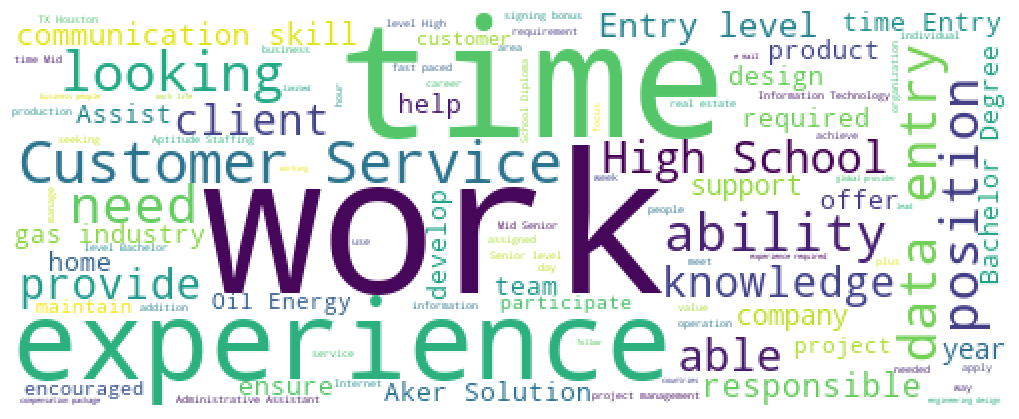

In [34]:
#FAKE WORD CLOUD
nlp = spacy.load("en_core_web_sm")
STOPWORDS = spacy.lang.en.stop_words.STOP_WORDS

wordcloud = WordCloud(min_font_size=4,width=500, height=200, background_color='white',stopwords=STOPWORDS).generate(' '.join(fake))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

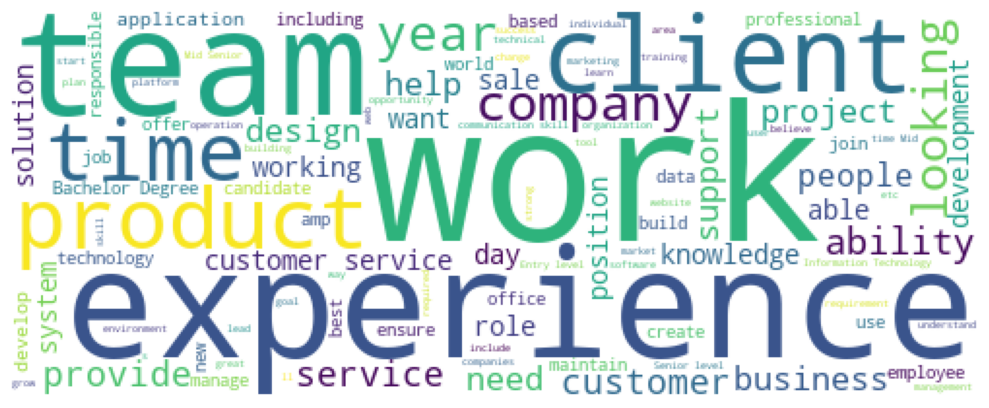

In [35]:
#REAL WORD CLOUD

wordcloud = WordCloud(min_font_size=4,width=500, height=200, background_color='white',stopwords=STOPWORDS).generate(' '.join(real))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout()
plt.show()

## Data Cleaning

Data cleaning bekerja dengan lowercasing, menghapus html tags, menghapus URLs, menghapus non-alphanumeric characters, tokenization, menghapus stopword, dan join token-token sebelumnya kembali menjadi string. Data cleaning membantu menyederhanakan text string yang ada. 

Kita memilih menggunakan teknik ini karena kita hanya ingin mencari tahu kata-kata apa yang sering muncul pada poster lowongan kerja palsu maupun real. Oleh karena itu, kita tidak memerlukan tanda baca dan sebagainya.

In [36]:
def clean_text(text):
    
    text = text.lower()
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^a-zA-Z0-9]', ' ', text)
    tokens = nltk.word_tokenize(text)
    stop_words = set(nltk.corpus.stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    cleaned_text = ' '.join(tokens)
    
    return cleaned_text

In [37]:
df['combined_text']=df['combined_text'].apply(clean_text)

In [38]:
df.head()

,job_id,has_company_logo,fraudulent,combined_text
0,2022,1,1,subsea process system engineer us tx houston a...
1,17576,0,1,customer service reps us ca seeking customer s...
2,5761,1,1,agency sales managers 150 175 000 yr us ny hud...
3,3190,0,1,payroll data coordinator positions earn 100 20...
4,4833,1,1,senior engineering product manager tw tpq taip...


## Data Normalization

Data normalization bekerja dengan tokenisasi, lemmatisasi, dan penggabungan token kembali. Tokenisasi adalah pemisahan teks menjadi kata-kata individu. Lemmatisasi adalah proses mengubah kata ke bentuk dasarnya, misal walked menjadi walk. Terakhir penggabungan token kembali menjadi satu string.

Kita memilih menggunakan teknik ini karena kita ingin mengganti semua kata menjadi bentuk bakunya. Sehingga, kata majemuk atau turunan yang memiliki akar kata yang sama, diklasifikasikan dalam satu klasifikasi yang sama.

In [39]:
nlp = spacy.load("en_core_web_sm")

def normalize_text(text):
    # Tokenize the text and apply lemmatization
    doc = nlp(text)
    normalized_words = [token.lemma_ for token in doc]
    normalized_text = ' '.join(normalized_words)
    return normalized_text

Example:

    Word: “walked”
    Rule Application: Remove “-ed”
    Result: “walk

So for example we have the sentence below:
Original Text: The quick brown foxes are jumping over the lazy dogs.
Lemmatized Text: the quick brown fox be jump over the lazy dog .

In [40]:
df['combined_text']=df['combined_text'].apply(normalize_text)

In [41]:
print(df['combined_text'])


0       subsea process system engineer we tx houston a...
1       customer service rep we can seek customer serv...
2       agency sale manager 150 175 000 yr we ny hudso...
3       payroll data coordinator position earn 100 200...
4       senior engineering product manager tw tpq taip...
                              ...                        
5995    interior stylist producer gb lnd 21000 25000 d...
5996    product marketing manager us can menlo interan...
5997    field executive hr gurgaon 96000 100000 candid...
5998    front end developer nz n auckland every day ch...
5999    read fragrance beauty promotional staff gb rea...
Name: combined_text, Length: 6000, dtype: object


## Feature Extraction dengan Part-of-Speech (POS) and CountVectorizer

Feature extraction bekerja dengan cara pembuatan fitur POS (Part of Speech), penggabungan fitur POS, pembuatan matriks fitur, transformasi teks dan fitur POS, penggabungan matriks fitur, penyimpanan vectorizer. 

Pembuatan Fitur POS mengambil teks yang digabungkan, memecahnya menjadi token (kata-kata), dan kemudian memberi tag setiap token dengan part of speech-nya (misalnya, kata benda, kata kerja, dll.). 

Penggabungan Fitur POS mengambil daftar tupel tag POS dan menggabungkannya menjadi satu string.

Pembuatan Matriks Fitur membuat objek CountVectorizer, yang akan mengubah teks menjadi matriks fitur. Setiap baris dalam matriks mewakili dokumen, dan setiap kolom mewakili fitur.

Transformasi Teks dan Fitur POS mengubah teks dan fitur POS menjadi matriks fitur menggunakan CountVectorizer.

Penggabungan Matriks Fitur menggabungkan dua matriks fitur menjadi satu.

Penyimpanan Vectorizer menyimpan objek vectorizer ke file.

Secara keseluruhan, kode ini mengubah teks mentah dan fitur POS menjadi representasi numerik yang dapat dipahami oleh algoritma machine learning.

Kita memilih menggunakan teknik ini karena kita ingin mengklasifikasi setiap kata sesuai part of speech-nya dan mengubahnya menjadi representasi numerik. Hal ini ditujukan untuk memudahkan komputer dalam membaca dan memproses data.

In [42]:
text_columns = ['combined_text']

df['pos_features'] = df[text_columns].apply(lambda x: nltk.pos_tag(word_tokenize(x[0])), axis=1)
df['pos_features'] = df['pos_features'].apply(lambda tags: ' '.join(tag[1] for tag in tags))

X_train = df.drop('fraudulent', axis=1)
y_train = df['fraudulent']

vectorizer = CountVectorizer(ngram_range=(1, 2))
text_matrix_train = vectorizer.fit_transform(X_train['combined_text'])
pos_matrix_train = vectorizer.transform(X_train['pos_features'])
combined_matrix_train = hstack([text_matrix_train, pos_matrix_train])

with open('countvectorizer.pkl', 'wb') as file:
    pickle.dump(vectorizer, file)

Example of POS Tagging

Consider the sentence: “The quick brown fox jumps over the lazy dog.”

After performing POS Tagging:

    “The” is tagged as determiner (DT)
    “quick” is tagged as adjective (JJ)
    “brown” is tagged as adjective (JJ)
    “fox” is tagged as noun (NN)
    “jumps” is tagged as verb (VBZ)
    “over” is tagged as preposition (IN)
    “the” is tagged as determiner (DT)
    “lazy” is tagged as adjective (JJ)
    “dog” is tagged as noun (NN)


In [43]:
X=combined_matrix_train
y=df['fraudulent'].values

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

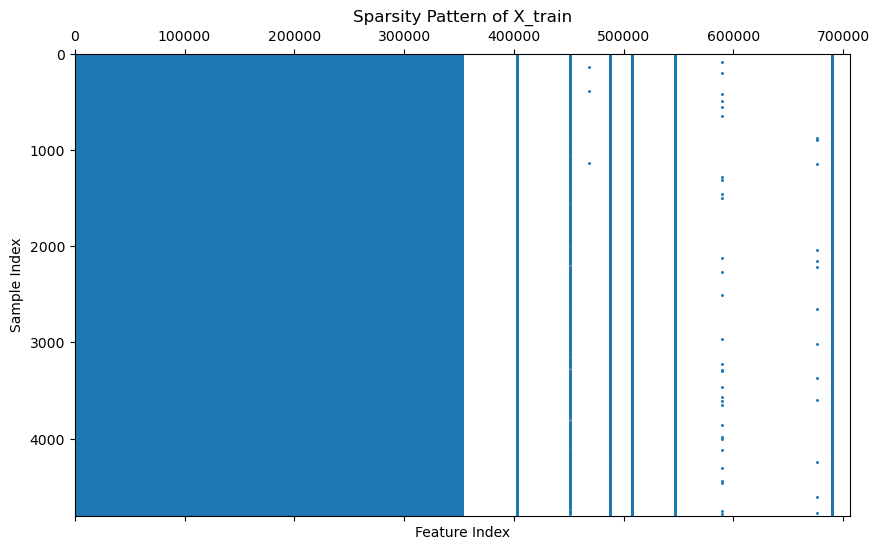

In [45]:
# Visualize sparsity pattern using spy plot
plt.figure(figsize=(10, 6))
plt.spy(X_train, markersize=1, aspect='auto')
plt.title('Sparsity Pattern of X_train')
plt.xlabel('Feature Index')
plt.ylabel('Sample Index')
plt.show()

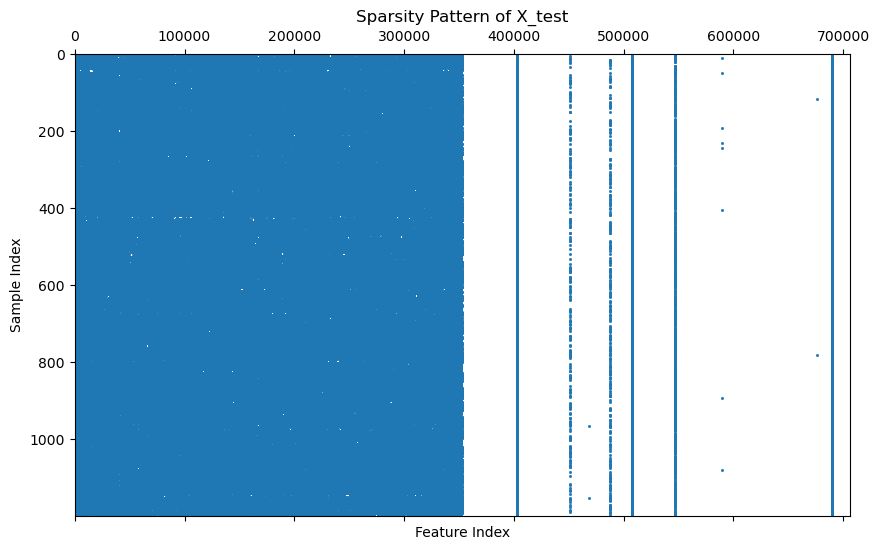

In [46]:
# Visualize sparsity pattern using spy plot
plt.figure(figsize=(10, 6))
plt.spy(X_test, markersize=1, aspect='auto')
plt.title('Sparsity Pattern of X_test')
plt.xlabel('Feature Index')
plt.ylabel('Sample Index')
plt.show()

Bayangkan kita memiliki sejumlah kotak, dan setiap kotak memiliki entri yang bisa berupa angka atau kata-kata. Jika ada kotak-kotak yang hanya berisi angka dan tidak ada kata-kata, kita bisa mengatakan bahwa kotak-kotak tersebut memiliki pola kekosongan yang terkait dengan angka. Sebaliknya, jika ada kotak-kotak yang hanya berisi kata-kata dan tidak ada angka, itu adalah pola kekosongan yang terkait dengan kata-kata.

Jadi, sparsity pattern dalam kasus ini adalah cara kita melihat di mana kotak-kotak di mana hanya angka yang ada dan di mana kotak-kotak di mana hanya kata-kata yang ada. Ini membantu kita memahami bagaimana data kita terorganisir dan apa yang ada di dalamnya. Dengan memahami pola kekosongan ini, kita bisa tahu di mana kita harus mencari angka dan di mana kita harus mencari kata-kata ketika kita ingin menggunakan atau menganalisis data kita.

Karena data kita sisa string dan integer, maka dengan visualisasi training dan testing data ini, kita dapat mudah mengetahui harus mencari string atau integer di bagian mana ketika kita ingin menggunakannya untuk analisa data.

In [47]:
# Define models with adjusted scoring functions
models = [
    ('Logistic Regression', Pipeline([('scaler', StandardScaler(with_mean=False)), ('model', LogisticRegression(max_iter=500))])),
    ('Multinomial Naive Bayes', Pipeline([('model', MultinomialNB())])),
    ('RBF SVM', Pipeline([('scaler', StandardScaler(with_mean=False)), ('model', SVC(kernel='rbf', gamma=2, C=1, random_state=42))])),
    ('Neural Network (MLP) Layer 1', Pipeline([('scaler', StandardScaler(with_mean=False)), ('model', MLPClassifier(hidden_layer_sizes=1, alpha=1, max_iter=2000, random_state=42))])),
    ('Extra Trees Classifier', Pipeline([('model', ExtraTreesClassifier(max_depth = 15, n_estimators=100, random_state=42))])),
    ('Random Forest', Pipeline([('model', RandomForestClassifier(max_depth = 15, random_state=42, n_estimators=100))]))
]


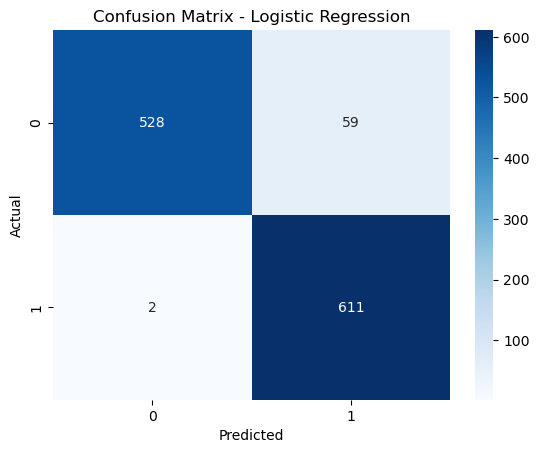

Model: Logistic Regression
Test set accuracy: 0.9491666666666667
Test set precision: 0.9540833568009012
Test set recall: 0.9481131420027735
Test set F1 score: 0.9489223095768576
Cross-Validation Scores: [0.955      0.9575     0.94416667 0.94916667 0.9475    ]
Mean CV Score: 0.9506666666666668
K-Fold 1 Accuracy: 0.9491666666666667
K-Fold 2 Accuracy: 0.9516666666666667
K-Fold 3 Accuracy: 0.9433333333333334
K-Fold 4 Accuracy: 0.9433333333333334
K-Fold 5 Accuracy: 0.9525
Stratified K-Fold 1 Accuracy: 0.9558333333333333
Stratified K-Fold 2 Accuracy: 0.9516666666666667
Stratified K-Fold 3 Accuracy: 0.9491666666666667
Stratified K-Fold 4 Accuracy: 0.945
Stratified K-Fold 5 Accuracy: 0.9541666666666667


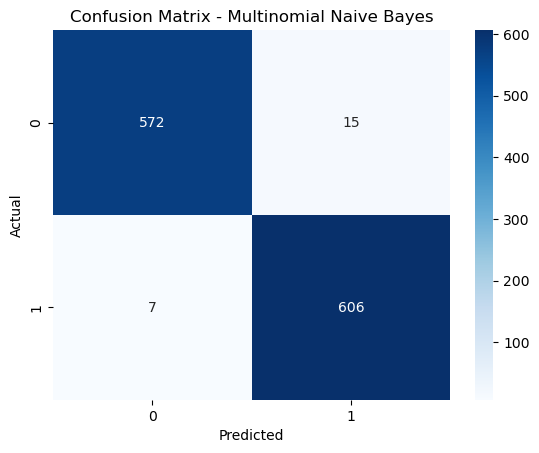

Model: Multinomial Naive Bayes
Test set accuracy: 0.9816666666666667
Test set precision: 0.9818778003053741
Test set recall: 0.9815135438580889
Test set F1 score: 0.9816519372496254
Cross-Validation Scores: [0.98333333 0.985      0.98416667 0.97833333 0.9775    ]
Mean CV Score: 0.9816666666666667
K-Fold 1 Accuracy: 0.9816666666666667
K-Fold 2 Accuracy: 0.9825
K-Fold 3 Accuracy: 0.9775
K-Fold 4 Accuracy: 0.9816666666666667
K-Fold 5 Accuracy: 0.9833333333333333
Stratified K-Fold 1 Accuracy: 0.9808333333333333
Stratified K-Fold 2 Accuracy: 0.9808333333333333
Stratified K-Fold 3 Accuracy: 0.9816666666666667
Stratified K-Fold 4 Accuracy: 0.9766666666666667
Stratified K-Fold 5 Accuracy: 0.9833333333333333


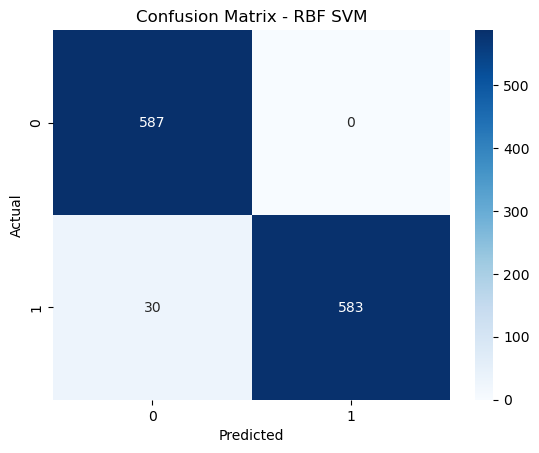

Model: RBF SVM
Test set accuracy: 0.975
Test set precision: 0.9756888168557536
Test set recall: 0.9755301794453508
Test set F1 score: 0.9749997222191358
Cross-Validation Scores: [0.96416667 0.9725     0.9775     0.96333333 0.97      ]
Mean CV Score: 0.9695
K-Fold 1 Accuracy: 0.975
K-Fold 2 Accuracy: 0.97
K-Fold 3 Accuracy: 0.9666666666666667
K-Fold 4 Accuracy: 0.9625
K-Fold 5 Accuracy: 0.9758333333333333
Stratified K-Fold 1 Accuracy: 0.9758333333333333
Stratified K-Fold 2 Accuracy: 0.9683333333333334
Stratified K-Fold 3 Accuracy: 0.9683333333333334
Stratified K-Fold 4 Accuracy: 0.975
Stratified K-Fold 5 Accuracy: 0.9683333333333334


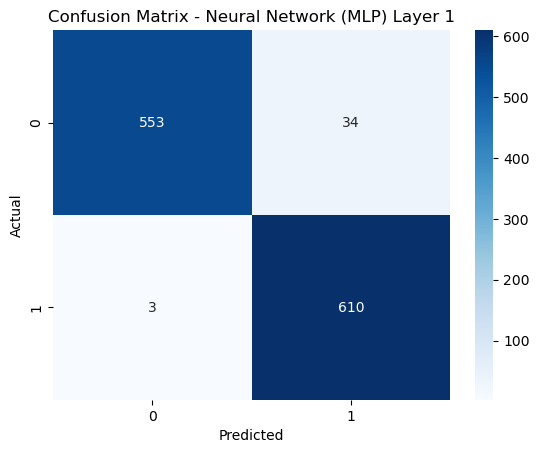

Model: Neural Network (MLP) Layer 1
Test set accuracy: 0.9691666666666666
Test set precision: 0.970904642745431
Test set recall: 0.9685922002273288
Test set F1 score: 0.9690969416412447
Cross-Validation Scores: [0.97416667 0.97583333 0.96416667 0.96833333 0.97083333]
Mean CV Score: 0.9706666666666667
K-Fold 1 Accuracy: 0.9683333333333334
K-Fold 2 Accuracy: 0.975
K-Fold 3 Accuracy: 0.9641666666666666
K-Fold 4 Accuracy: 0.97
K-Fold 5 Accuracy: 0.9808333333333333
Stratified K-Fold 1 Accuracy: 0.98
Stratified K-Fold 2 Accuracy: 0.9675
Stratified K-Fold 3 Accuracy: 0.9708333333333333
Stratified K-Fold 4 Accuracy: 0.9641666666666666
Stratified K-Fold 5 Accuracy: 0.9716666666666667


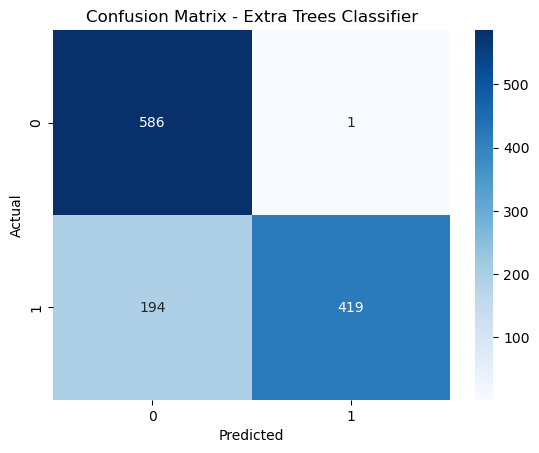

Model: Extra Trees Classifier
Test set accuracy: 0.8375
Test set precision: 0.8744505494505495
Test set recall: 0.8409100383235464
Test set F1 score: 0.8342906471233493
Cross-Validation Scores: [0.84666667 0.84166667 0.83833333 0.84583333 0.84916667]
Mean CV Score: 0.8443333333333334
K-Fold 1 Accuracy: 0.8375
K-Fold 2 Accuracy: 0.8566666666666667
K-Fold 3 Accuracy: 0.8458333333333333
K-Fold 4 Accuracy: 0.8358333333333333
K-Fold 5 Accuracy: 0.8725
Stratified K-Fold 1 Accuracy: 0.8541666666666666
Stratified K-Fold 2 Accuracy: 0.8666666666666667
Stratified K-Fold 3 Accuracy: 0.8641666666666666
Stratified K-Fold 4 Accuracy: 0.8541666666666666
Stratified K-Fold 5 Accuracy: 0.8558333333333333


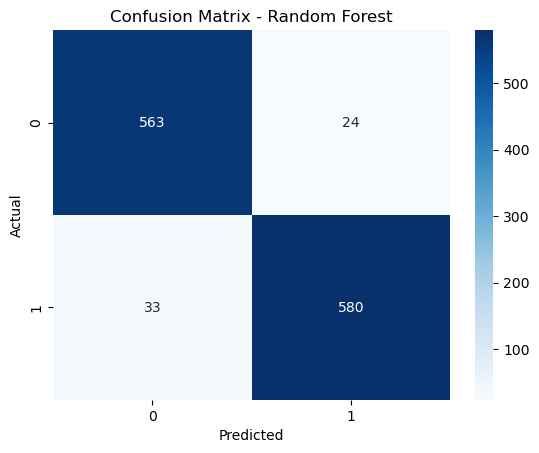

Model: Random Forest
Test set accuracy: 0.9525
Test set precision: 0.9524478865727366
Test set recall: 0.9526402672365638
Test set F1 score: 0.9524904651002875
Cross-Validation Scores: [0.9575     0.9525     0.95416667 0.94416667 0.94833333]
Mean CV Score: 0.9513333333333334
K-Fold 1 Accuracy: 0.9566666666666667
K-Fold 2 Accuracy: 0.955
K-Fold 3 Accuracy: 0.94
K-Fold 4 Accuracy: 0.9533333333333334
K-Fold 5 Accuracy: 0.9483333333333334
Stratified K-Fold 1 Accuracy: 0.9558333333333333
Stratified K-Fold 2 Accuracy: 0.9475
Stratified K-Fold 3 Accuracy: 0.9366666666666666
Stratified K-Fold 4 Accuracy: 0.9525
Stratified K-Fold 5 Accuracy: 0.9525


In [49]:


# Define adjusted scoring functions for multiclass classification
scoring_metrics = {
    'Accuracy': 'accuracy',
    'Precision Macro': make_scorer(precision_score, average='macro'),
    'Recall Macro': make_scorer(recall_score, average='macro'),
    'F1 Macro': make_scorer(f1_score, average='macro')
}

# Results storage
results = []

# Define the K-fold Cross Validators
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Loop over models
for name, model in models:
    try:
        # Fit the model
        model.fit(X_train, y_train)

        # Predictions on test set
        y_pred = model.predict(X_test)

        # Evaluation metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='macro')
        recall = recall_score(y_test, y_pred, average='macro')
        f1 = f1_score(y_test, y_pred, average='macro')

        # Confusion matrix
        cm = confusion_matrix(y_test, y_pred)

        # Plot confusion matrix
        sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
        plt.title(f'Confusion Matrix - {name}')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

        # Print evaluation metrics
        print(f'Model: {name}')
        print('Test set accuracy:', accuracy)
        print('Test set precision:', precision)
        print('Test set recall:', recall)
        print('Test set F1 score:', f1)

        # Append results
        results.append({
            'Model': name,
            'Test set accuracy': accuracy,
            'Test set precision': precision,
            'Test set recall': recall,
            'Test set F1 score': f1,
            'Confusion matrix': cm
        })

        # Perform cross-validation using cross_val_score
        cv_scores = cross_val_score(model, X, y, cv=5)
        print(f'Cross-Validation Scores: {cv_scores}')
        print(f'Mean CV Score: {cv_scores.mean()}')

        #k-fold cross validation
        fold_no = 1
        for train, test in kfold.split(X, y):
            try:
                model.fit(X[train], y[train])
                predictions = model.predict(X[test])
                print(f'K-Fold {fold_no} Accuracy: {accuracy_score(y[test], predictions)}')
                fold_no += 1
            except ConvergenceWarning:
                print(f'K-Fold {fold_no} failed to converge.')
                fold_no += 1
        #stratified k-fold validation
        fold_no = 1
        for train, test in skfold.split(X, y):
            try:
                model.fit(X[train], y[train])
                predictions = model.predict(X[test])
                print(f'Stratified K-Fold {fold_no} Accuracy: {accuracy_score(y[test], predictions)}')
                fold_no += 1
            except:
                print(f'Stratified K-Fold {fold_no} failed to converge.')
                fold_no += 1  
    except Exception as e:
        print(f"Model: {name} failed with exception: {e}")


## VISUALISASI HASIL

Kolom 0,0 True Positive artinya hasil prediksi dan benar bernilai positif, Kolom 11 True Negative artinya prediksi dan kenyataannya benar bernilai negatif, Kolom 0,1 False Positive yang artinya prediksi bernilai positive dimana seharusnya negative, begitu pula kolom 1,0 False Negative dimana hasil prediksi bernilai negatif dimana nilai seharusnya positif.

## PENJELASAN DAN PENYETELAN MODEL

Logistic Regression:
Kapan digunakan: Cocok untuk kasus klasifikasi biner (dua kelas).
Kelebihan: Mudah diinterpretasi, cepat dilatih, cocok untuk data yang linier terpisah.
Keterbatasan: Tidak cocok untuk masalah klasifikasi non-linier.

Multinomial Naive Bayes:
Kapan digunakan: Cocok untuk klasifikasi teks atau data dengan fitur kategorikal yang dihitung dalam bentuk frekuensi, seperti pengklasifikasi email spam atau analisis sentimen pada teks.
Kelebihan: Mudah diimplementasikan dan cepat dilatih, baik dalam menangani data dengan dimensi tinggi, serta cocok untuk data yang memiliki distribusi multinomial.
Keterbatasan: Tidak cocok untuk masalah di mana fitur memiliki dependensi kompleks atau interaksi antar fitur.

Support Vector Machines (SVM):
Kapan digunakan: Cocok untuk klasifikasi biner dengan margin linier atau non-linier yang besar.
Kelebihan: Efektif dalam dimensi tinggi, dapat menangani masalah klasifikasi non-linier melalui kernel.
Keterbatasan: Memerlukan tuning parameter, tidak cocok untuk set data besar.

Neural Network:
Kapan digunakan: Cocok untuk klasifikasi dan regresi dalam masalah yang kompleks dan berdimensi tinggi, seperti gambar, teks, dan suara.
Kelebihan: Mampu memodelkan pola yang sangat kompleks dalam data, bisa memberikan hasil yang baik dalam masalah yang tidak linear atau non-linear.
Keterbatasan: Memerlukan jumlah data yang besar untuk pelatihan yang efektif, rentan terhadap overfitting, dan memerlukan komputasi yang besar, koneksi neural yang dibuat sulit untuk diinterpretasi.

Extra Trees:
Kapan digunakan: Cocok untuk klasifikasi terlebih saat ingin membuat model yang lebih general dan memerlukan waktu yang cepat untuk dilatih.
Kelebihan: Lebih efisien daripada Random Forest karena menggunakan sampel acak dalam proses pemilihan fitur dan pembentukan pohon, mampu mengatasi overfitting, dan cenderung lebih cepat dalam pelatihan.
Keterbatasan: Tidak mudah diinterpretasi seperti RF atau Decision Tree.


Random Forest:
Kapan digunakan: Cocok untuk klasifikasi dan dapat menangani banyak fitur.
Kelebihan: Mengurangi overfitting melalui keputusan beberapa pohon.
Keterbatasan: Tidak mudah diinterpretasi seperti Decision Tree.


Penyetelan hyperparameter dari masing-masing model machine learning juga ditentukan setelah banyak try dan error. Tahap ini memerlukan pengujian dengan cara mempelajari dampak setiap parameter pada model, merubah parameter, dan melakukan pengecekan ketepatan accuracy dan lain-lain. Itulah alasan mengapa alasan model kami memiliki ketepatan akurasi dan presisi tinggi.

In [50]:
df_results = pd.DataFrame(results)

# Display DataFrame
df_results

,Model,Test set accuracy,Test set precision,Test set recall,Test set F1 score,Confusion matrix
0,Logistic Regression,0.949167,0.954083,0.948113,0.948922,"[[528, 59], [2, 611]]"
1,Multinomial Naive Bayes,0.981667,0.981878,0.981514,0.981652,"[[572, 15], [7, 606]]"
2,RBF SVM,0.975000,0.975689,0.975530,0.975000,"[[587, 0], [30, 583]]"
3,Neural Network (MLP) Layer 1,0.969167,0.970905,0.968592,0.969097,"[[553, 34], [3, 610]]"
4,Extra Trees Classifier,0.837500,0.874451,0.840910,0.834291,"[[586, 1], [194, 419]]"
5,Random Forest,0.952500,0.952448,0.952640,0.952490,"[[563, 24], [33, 580]]"


Algoritma machine learning yang kami gunakan berjenis clustering. Kami memilih untuk menggunakan algoritma-algoritma ini karena hasil keluaran kami hanya terbagi menjadi 2, yaitu real atau fraudulent (fake). Oleh karena itu, algoritma machine learning yang kami gunakan sudah sesuai dengan masalah yang dihadapi.

Performance measure kami dihitung menggunakan accuracy, precision, recall, f1 score, cross_val_score, k-fold, stratified k-fold. Akurasi, presisi, recall, dan skor F1 memberikan kita pemahaman tentang seberapa baik model kita dalam mengklasifikasikan data, sementara cross_val_score, k-fold, dan stratified k-fold membantu kita memahami seberapa konsisten kinerja model kita di berbagai subset data.

## Kesimpulan

Model yang terbaik untuk mendeteksi fake job posting adalah model Neural Network (MLP Layer 1) menghasilkan scores yang sangat tinggi dengan rata-rata 0.97. Hasil confusion matrix sangat baik dimana hasil False Positive dan Negative sangat sedikit dibandingkan dengan Hasil True Positive dan Negative. Akan tetapi, waktu training model sangat lama dibanding dengan model lain.